### import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.pipeline import Pipeline

In [3]:
# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [5]:
# 다운로드
data20 = pd.read_csv("C:\\Users\\rladb\\Desktop\\2022년 2학기\\머신러닝\\ML_Project\\2020_LoL_esports_match_data_from_OraclesElixir_20221210.csv", encoding = "cp949",na_values= '#DIV/0!' )
data21 = pd.read_csv("C:\\Users\\rladb\\Desktop\\2022년 2학기\\머신러닝\\ML_Project\\2021_LoL_esports_match_data_from_OraclesElixir_20221210.csv", encoding = "cp949",na_values= '#DIV/0!' )
data22 = pd.read_csv("C:\\Users\\rladb\\Desktop\\2022년 2학기\\머신러닝\\ML_Project\\2022_LoL_esports_match_data_from_OraclesElixir_20221206.csv", encoding = "cp949",na_values= '#DIV/0!' )

# list 저장
df_list = [data20,data21,data22]

# 합침
data_clean = pd.concat(df_list, ignore_index = True)

C:\Users\rladb\AppData\Local\Temp\ipykernel_2808\812191727.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data22 = pd.read_csv("C:\\Users\\rladb\\Desktop\\2022년 2학기\\머신러닝\\ML_Project\\2022_LoL_esports_match_data_from_OraclesElixir_20221206.csv", encoding = "cp949",na_values= '#DIV/0!' )


### 데이터 전처리

In [6]:
print(len(data20),len(data21),len(data22)," = ",len(data20)+len(data21)+len(data22))
print(len(data_clean))

118668 150264 148200  =  417132
417132


In [7]:
data_clean.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 7:33,1.0,9.24,...,118.0,165.0,166.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 7:33,1.0,9.24,...,98.0,-399.0,150.0,-7.0,0.0,0.0,0.0,1.0,0.0,0.0
2,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 7:33,1.0,9.24,...,140.0,-409.0,-1837.0,-11.0,0.0,0.0,1.0,0.0,1.0,0.0
3,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 7:33,1.0,9.24,...,135.0,51.0,-401.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 7:33,1.0,9.24,...,28.0,-233.0,257.0,-8.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
data_clean["datacompleteness"].value_counts()

complete    381732
partial      34884
reparse        516
Name: datacompleteness, dtype: int64

In [9]:
data_clean["league"].value_counts()

LDL     39192
LPL     27120
LCK     17268
LCSA    14028
UPL     12612
        ...  
NEST      600
NERD      504
AOL       444
MSC       300
Riot      240
Name: league, Length: 72, dtype: int64

#### data가 complete된 것 만 추출

In [6]:
data_clean = data_clean[data_clean["datacompleteness"].str.contains("complete")];data_clean.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 7:33,1.0,9.24,...,118.0,165.0,166.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 7:33,1.0,9.24,...,98.0,-399.0,150.0,-7.0,0.0,0.0,0.0,1.0,0.0,0.0
2,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 7:33,1.0,9.24,...,140.0,-409.0,-1837.0,-11.0,0.0,0.0,1.0,0.0,1.0,0.0
3,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 7:33,1.0,9.24,...,135.0,51.0,-401.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 7:33,1.0,9.24,...,28.0,-233.0,257.0,-8.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
data_clean["datacompleteness"].value_counts()

complete    381732
Name: datacompleteness, dtype: int64

#### team data만 가져오기

In [12]:
data_clean["position"].value_counts()

top     63622
jng     63622
mid     63622
bot     63622
sup     63622
team    63622
Name: position, dtype: int64

In [7]:
data = data_clean[data_clean["position"].str.contains("team")]

In [22]:
len(data)

63622

In [23]:
data.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
10,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 7:33,1.0,9.24,...,519.0,-825.0,-1665.0,-12.0,0.0,0.0,1.0,1.0,2.0,0.0
11,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 7:33,1.0,9.24,...,507.0,825.0,1665.0,12.0,1.0,2.0,0.0,0.0,0.0,1.0
22,ESPORTSTMNT03/1241322,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 9:00,2.0,9.24,...,557.0,-5484.0,-4833.0,-56.0,0.0,0.0,6.0,6.0,7.0,0.0
23,ESPORTSTMNT03/1241322,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 9:00,2.0,9.24,...,501.0,5484.0,4833.0,56.0,6.0,7.0,0.0,0.0,0.0,6.0
34,ESPORTSTMNT03/1241324,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 10:05,3.0,9.24,...,531.0,2566.0,2097.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 필요한 열 추출

In [24]:
len(data.columns)

128

In [25]:
data.columns

Index(['gameid', 'datacompleteness', 'url', 'league', 'year', 'split',
       'playoffs', 'date', 'game', 'patch',
       ...
       'opp_csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15',
       'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15',
       'opp_deathsat15'],
      dtype='object', length=128)

##### 필요없는 변수 제거

In [8]:
data = data[['result','top_dtpm','jng_ka','mid_dpm','bot_dpm','sup_apg','kills','deaths','assists','firstblood','team kpm','ckpm','firstdragon','dragons','elders','firstherald',
'heralds','firstbaron','barons','firsttower','towers','firsttothreetowers','inhibitors','dpm','wpm','totalgold','goldat10','xpat10','csat10','golddiffat10','xpdiffat10','csdiffat10','killsat10','assistsat10','deathsat10','goldat15','xpat15','csat15','golddiffat15','xpdiffat15','csdiffat15','killsat15','assistsat15','deathsat15']]

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63622 entries, 10 to 417131
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   result              63622 non-null  int64  
 1   top_dtpm            63622 non-null  float64
 2   jng_ka              63423 non-null  float64
 3   mid_dpm             63622 non-null  float64
 4   bot_dpm             63622 non-null  float64
 5   sup_apg             63622 non-null  float64
 6   kills               63622 non-null  int64  
 7   deaths              63622 non-null  int64  
 8   assists             63622 non-null  int64  
 9   firstblood          63600 non-null  float64
 10  team kpm            63622 non-null  float64
 11  ckpm                63622 non-null  float64
 12  firstdragon         63614 non-null  float64
 13  dragons             63606 non-null  float64
 14  elders              63606 non-null  float64
 15  firstherald         63622 non-null  float64
 16  he

In [28]:
(62622-60030)/62622*100

4.139120436907158

##### 결측값 제거

In [9]:
na_droped_data = data.dropna()
na_droped_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60030 entries, 10 to 417131
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   result              60030 non-null  int64  
 1   top_dtpm            60030 non-null  float64
 2   jng_ka              60030 non-null  float64
 3   mid_dpm             60030 non-null  float64
 4   bot_dpm             60030 non-null  float64
 5   sup_apg             60030 non-null  float64
 6   kills               60030 non-null  int64  
 7   deaths              60030 non-null  int64  
 8   assists             60030 non-null  int64  
 9   firstblood          60030 non-null  float64
 10  team kpm            60030 non-null  float64
 11  ckpm                60030 non-null  float64
 12  firstdragon         60030 non-null  float64
 13  dragons             60030 non-null  float64
 14  elders              60030 non-null  float64
 15  firstherald         60030 non-null  float64
 16  he

array([[<AxesSubplot:title={'center':'result'}>,
        <AxesSubplot:title={'center':'top_dtpm'}>,
        <AxesSubplot:title={'center':'jng_ka'}>,
        <AxesSubplot:title={'center':'mid_dpm'}>,
        <AxesSubplot:title={'center':'bot_dpm'}>,
        <AxesSubplot:title={'center':'sup_apg'}>,
        <AxesSubplot:title={'center':'kills'}>],
       [<AxesSubplot:title={'center':'deaths'}>,
        <AxesSubplot:title={'center':'assists'}>,
        <AxesSubplot:title={'center':'firstblood'}>,
        <AxesSubplot:title={'center':'team kpm'}>,
        <AxesSubplot:title={'center':'ckpm'}>,
        <AxesSubplot:title={'center':'firstdragon'}>,
        <AxesSubplot:title={'center':'dragons'}>],
       [<AxesSubplot:title={'center':'elders'}>,
        <AxesSubplot:title={'center':'firstherald'}>,
        <AxesSubplot:title={'center':'heralds'}>,
        <AxesSubplot:title={'center':'firstbaron'}>,
        <AxesSubplot:title={'center':'barons'}>,
        <AxesSubplot:title={'center':'firs

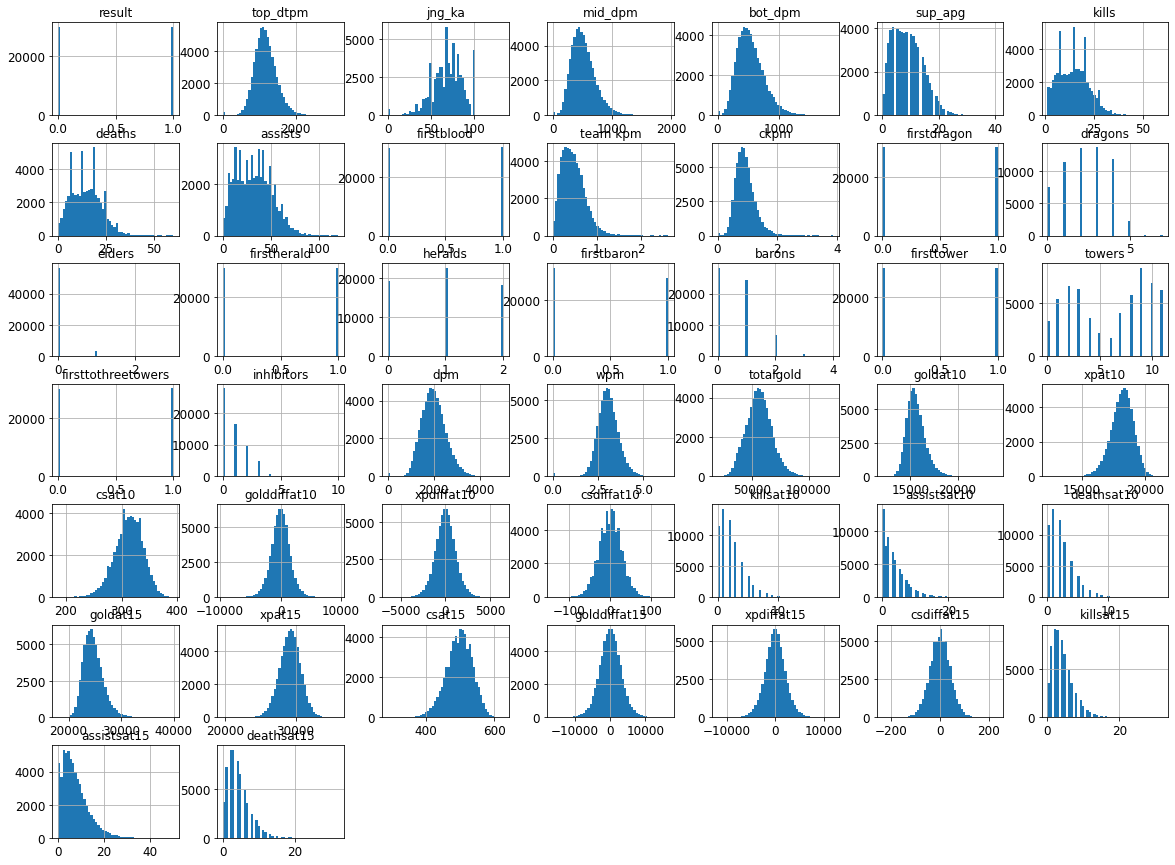

In [30]:
na_droped_data.hist(bins=50, figsize=(20,15))

In [161]:
na_droped_data.head()

,result,top_dtpm,jng_ka,mid_dpm,bot_dpm,sup_apg,kills,deaths,assists,firstblood,...,deathsat10,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15
10,1,881.6757,76.470588,470.1622,795.0811,3.0,17,11,33,0.0,...,0.0,21953.0,27219.0,507.0,-825.0,-1665.0,-12.0,0.0,0.0,1.0
11,0,939.6756,72.727273,299.3514,467.9189,10.0,11,17,25,1.0,...,0.0,22778.0,28884.0,519.0,825.0,1665.0,12.0,1.0,2.0,0.0
22,0,1138.8415,100.000000,584.8855,506.0799,3.0,5,21,16,0.0,...,3.0,21714.0,26869.0,501.0,-5484.0,-4833.0,-56.0,0.0,0.0,6.0
23,1,1476.5604,71.428571,437.6740,429.0795,10.0,21,5,41,1.0,...,0.0,27198.0,31702.0,557.0,5484.0,4833.0,56.0,6.0,7.0,0.0
34,1,638.9597,38.095238,399.1350,752.3320,13.0,21,4,34,0.0,...,0.0,24882.0,30349.0,584.0,2566.0,2097.0,53.0,0.0,0.0,0.0


### 스케일링 및 train, test 분리

In [50]:
from sklearn.model_selection import train_test_split

X = na_droped_data.iloc[:,1:]
y = na_droped_data['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.feature_selection import f_classif, SelectKBest

# 특성 선택을 위한 SelectKBest를 진행 - K는 특성 수
selector = SelectKBest(score_func = f_classif, k = 15)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# 선택된 column의 이름을 확인하는 작업
all_names = X_train.columns
selected_mask = selector.get_support()
selected_name = all_names[selected_mask]
selected_name

Index(['sup_apg', 'kills', 'deaths', 'assists', 'team kpm', 'dragons',
       'firstbaron', 'barons', 'towers', 'firsttothreetowers', 'inhibitors',
       'golddiffat10', 'goldat15', 'golddiffat15', 'xpdiffat15'],
      dtype='object')

In [41]:
X_train[selected_name].head()

,sup_apg,kills,deaths,assists,team kpm,dragons,firstbaron,barons,towers,firsttothreetowers,inhibitors,golddiffat10,goldat15,golddiffat15,xpdiffat15
330107,16.0,24,21,56,0.6847,4.0,0.0,1.0,9.0,1.0,1.0,-558.0,22515.0,-2613.0,-1899.0
317003,10.0,23,19,61,0.6296,4.0,1.0,2.0,10.0,1.0,2.0,1085.0,26430.0,1491.0,-3.0
254770,10.0,26,8,44,1.2093,2.0,0.0,0.0,9.0,1.0,1.0,2745.0,29328.0,5175.0,1572.0
410722,5.0,7,29,13,0.2670,1.0,0.0,0.0,3.0,0.0,0.0,-384.0,25454.0,-166.0,872.0
157415,4.0,8,25,19,0.2839,0.0,0.0,0.0,2.0,0.0,0.0,-2550.0,23719.0,-3923.0,-2885.0


### 로지스틱 회귀

In [42]:
from sklearn.linear_model import LogisticRegression  
  
log_clf = LogisticRegression()  

log_clf.fit(X_train[selected_name], y_train)

from sklearn.metrics import accuracy_score
accuracy_score(y_train, log_clf.predict(X_train[selected_name]))

c:\Users\rladb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9778444111277694

In [483]:
from sklearn.preprocessing import StandardScaler  
  
scaler = StandardScaler()  

scaled_X = scaler.fit_transform(X)  

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.preprocessing import StandardScaler  
  
scaler = StandardScaler()  

scaled_X_train = scaler.fit_transform(X_train[selected_name])  

log_clf2 = LogisticRegression()  

log_clf2.fit(scaled_X_train, y_train)

from sklearn.metrics import accuracy_score
accuracy_score(y_train, log_clf.predict(scaled_X_train))

c:\Users\rladb\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.9715142428785607

In [453]:
from sklearn.linear_model import LogisticRegression  
  
log_clf = LogisticRegression()  

log_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
accuracy_score(y_train, log_clf.predict(X_train))

c:\Users\rladb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9831542562052307

#### 다중공선성

In [32]:
X = na_droped_data.iloc[:,1:]

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,33.700991,top_dtpm
1,20.784536,jng_ka
2,18.269095,mid_dpm
3,20.114975,bot_dpm
4,27.967494,sup_apg
5,207.860979,kills
6,106.656761,deaths
7,82.533579,assists
8,2.822653,firstblood
9,269.453074,team kpm


In [34]:
vif[vif["VIF Factor"]<10]

,VIF Factor,features
8,2.822653,firstblood
11,2.922433,firstdragon
13,1.293222,elders
14,6.796837,firstherald
15,8.607397,heralds
16,7.014972,firstbaron
17,8.016948,barons
18,4.346584,firsttower
20,4.737173,firsttothreetowers
21,6.539711,inhibitors


In [35]:
vif_X = X[['firstblood','firstdragon','elders','firstherald','heralds','firstbaron','barons','firsttower','firsttothreetowers','inhibitors']]
vif_X.head()

,firstblood,firstdragon,elders,firstherald,heralds,firstbaron,barons,firsttower,firsttothreetowers,inhibitors
10,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
11,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,1.0,1.0,0.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0
34,0.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0


In [36]:
# 다시 데이터 분류
y = na_droped_data['result'].values

X_train, X_test, y_train, y_test = train_test_split(vif_X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression  
  
log_clf = LogisticRegression(max_iter=500)  

log_clf.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, log_clf.predict(X_train))

0.9513576545060803

In [39]:
# test
accuracy_score(y_test, log_clf.predict(X_test))

0.9526903215059137

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score,cross_val_predict

y_train_pred = cross_val_predict(log_clf, X_train, y_train, cv = 5)
confusion_matrix(y_train, y_train_pred)

array([[22321,  1606],
       [  725, 23372]], dtype=int64)

In [66]:
y_train_pred = cross_val_predict(log_clf, X_train, y_train, cv = 5)
confusion_matrix(y_train,log_clf.predict(X_train))

array([[22314,  1613],
       [  723, 23374]], dtype=int64)

In [43]:
y_scores = cross_val_score(log_clf, X_train, y_train, cv = 5,scoring="accuracy")
print(np.mean(y_scores))

0.9514617586243455


In [85]:
y_scores = cross_val_score(log_clf, X_train, y_train, cv = 3,scoring="accuracy")
print(np.mean(y_scores))

0.9513784774279527


In [40]:
# 테스트용 실제 레이블 값을 y_test, 예측값을 pred라고 하자.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,roc_auc_score

# 오차행렬
print(confusion_matrix(y_test, log_clf.predict(X_test)))
# 정확도
print(accuracy_score(y_test, log_clf.predict(X_test)))
# 정밀도
print(precision_score(y_test, log_clf.predict(X_test)))
# 재현율
print(recall_score(y_test, log_clf.predict(X_test)))
# ROC
print(roc_auc_score(y_test, log_clf.predict(X_test)))

[[5611  387]
 [ 181 5827]]
0.9526903215059137
0.9377212745413582
0.9698735019973369
0.9526759974141402


In [69]:
y_scores1 = cross_val_predict(log_clf,X_train,y_train,cv = 5,method="decision_function")

In [70]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores1)

In [499]:
precisions

array([0.74684643, 0.74683858, 0.74686173, ..., 1.        , 1.        ,
       1.        ])

In [500]:
thresholds

array([-7.74942199, -7.74936514, -7.74895435, ..., 19.32948438,
       20.58424612, 21.82145517])

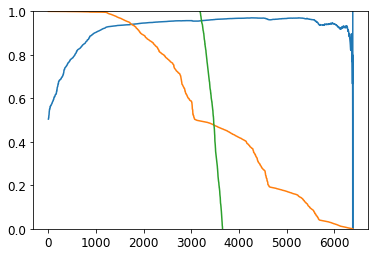

In [77]:
#plt.xlim(-50000,50000)
plt.ylim(0,1)
plt.plot(precisions)
plt.plot(recalls)
plt.plot(thresholds)

In [74]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train,y_scores1)

0.975105469568331

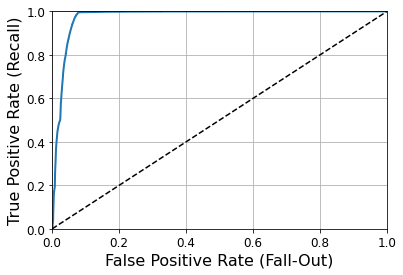

In [75]:
# ROC
from sklearn.metrics import roc_curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)  
fpr, tpr, thresholds = roc_curve(y_train, y_scores1)
plot_roc_curve(fpr, tpr)

### SVM

In [48]:
from sklearn.preprocessing import StandardScaler  
  
scaler = StandardScaler()  

scaled_X = scaler.fit_transform(X)  

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.feature_selection import f_classif, SelectKBest

# 특성 선택을 위한 SelectKBest를 진행 - K는 특성 수
selector = SelectKBest(score_func = f_classif, k = 15)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# 선택된 column의 이름을 확인하는 작업
all_names = X_train.columns
selected_mask = selector.get_support()
selected_name = all_names[selected_mask]
selected_name

Index(['sup_apg', 'kills', 'deaths', 'assists', 'team kpm', 'dragons',
       'firstbaron', 'barons', 'towers', 'firsttothreetowers', 'inhibitors',
       'golddiffat10', 'goldat15', 'golddiffat15', 'xpdiffat15'],
      dtype='object')

In [61]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler  
   
scaler = StandardScaler()  
#X_train[selected_name]vif_X
scaled_X_train = scaler.fit_transform(X_train[selected_name])  

svm_clf = svm.SVC(kernel='rbf',random_state=42)
svm_clf.fit(scaled_X_train,y_train)

SVC(random_state=42)

In [62]:
svm_clf.score(scaled_X_train,y_train)

0.9854031317674496

In [64]:
svm_clf.score(scaler.fit_transform(X_test[selected_name]),y_test)

0.9839247043145094

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, svm_clf.predict(scaled_X_train))

0.9854031317674496

In [124]:
# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1], 'gamma': [0.001, 0.01, 0.1]}

svm_clf = svm.SVC(kernel='rbf',random_state=42,probability=True)
grid_search_cv = GridSearchCV(svm_clf, param_grid, cv = 3,
                              n_jobs = -1,verbose=1)
grid_search_cv.fit(scaled_X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1], 'gamma': [0.001, 0.01, 0.1]},
             verbose=1)

In [67]:
print("최적 매개변수: {}".format(grid_search_cv.best_params_))
print("최고 교차 검증 점수: {:.2f}".format(grid_search_cv.best_score_))
print("최고 성능 모델:\n{}".format(grid_search_cv.best_estimator_))

최적 매개변수: {'C': 0.1, 'gamma': 0.1}
최고 교차 검증 점수: 0.98
최고 성능 모델:
SVC(C=0.1, gamma=0.1, random_state=42)


In [126]:
svm_bp = grid_search_cv.best_estimator_

In [46]:
accuracy_score(y_test, svm_clf.predict(scaler.fit_transform(X_test[selected_name])))

0.9839247043145094

In [502]:
y_scores1 = cross_val_predict(svm_clf,X_train,y_train,cv = 5,method="decision_function")

In [69]:
# 테스트용 실제 레이블 값을 y_test, 예측값을 pred라고 하자.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,roc_auc_score

# 오차행렬
print(confusion_matrix(y_test, svm_bp.predict(scaler.fit_transform(X_test[selected_name]))))
# 정확도
print(accuracy_score(y_test, svm_bp.predict(scaler.fit_transform(X_test[selected_name]))))
# 정밀도
print(precision_score(y_test, svm_bp.predict(scaler.fit_transform(X_test[selected_name]))))
# 재현율
print(recall_score(y_test, svm_bp.predict(scaler.fit_transform(X_test[selected_name]))))
# ROC
print(roc_auc_score(y_test, svm_bp.predict(scaler.fit_transform(X_test[selected_name]))))

[[5835  163]
 [  63 5945]]
0.981176078627353
0.973313686967911
0.9895139813581891
0.9811691280582209


### decision tree

In [129]:
from sklearn.model_selection import train_test_split

X = na_droped_data.iloc[:,1:]
y = na_droped_data['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.feature_selection import f_classif, SelectKBest

# 특성 선택을 위한 SelectKBest를 진행 - K는 특성 수
selector = SelectKBest(score_func = f_classif, k = 15)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# 선택된 column의 이름을 확인하는 작업
all_names = X_train.columns
selected_mask = selector.get_support()
selected_name = all_names[selected_mask]
selected_name

Index(['sup_apg', 'kills', 'deaths', 'assists', 'team kpm', 'dragons',
       'firstbaron', 'barons', 'towers', 'firsttothreetowers', 'inhibitors',
       'golddiffat10', 'goldat15', 'golddiffat15', 'xpdiffat15'],
      dtype='object')

In [71]:
from sklearn.tree import DecisionTreeClassifier

DT_clf = DecisionTreeClassifier(random_state=42)
DT_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [72]:
from sklearn.metrics import confusion_matrix
y_train_pred_no_cv = DT_clf.predict(X_train)
confusion_matrix(y_train, y_train_pred_no_cv)

array([[23927,     0],
       [    0, 24097]], dtype=int64)

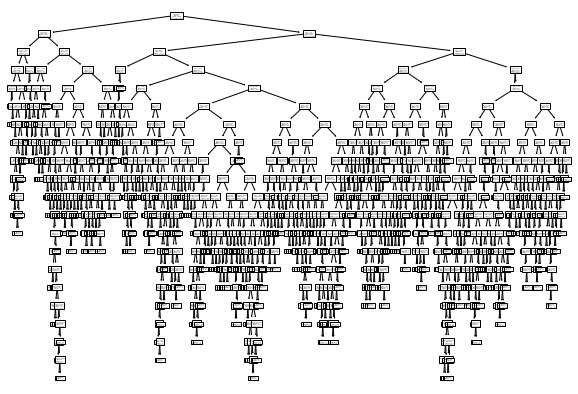

In [73]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(DT_clf)
plt.show()

In [81]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth' : [3,4,5],'min_samples_leaf': [50,100,150,200],'max_leaf_nodes':[4,5,6,7,8]}

tree_clf = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(tree_clf, param_grid, cv = 5,
                              n_jobs = -1,verbose=1)
grid_search_cv.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5],
                         'max_leaf_nodes': [4, 5, 6, 7, 8],
                         'min_samples_leaf': [50, 100, 150, 200]},
             verbose=1)

In [82]:
grid_search_cv.best_params_

{'max_depth': 4, 'max_leaf_nodes': 8, 'min_samples_leaf': 50}

In [83]:
# 전처리만 한 데이터에 파라미터 결정
dt_1 = grid_search_cv.best_estimator_;dt_1

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=8, min_samples_leaf=50,
                       random_state=42)

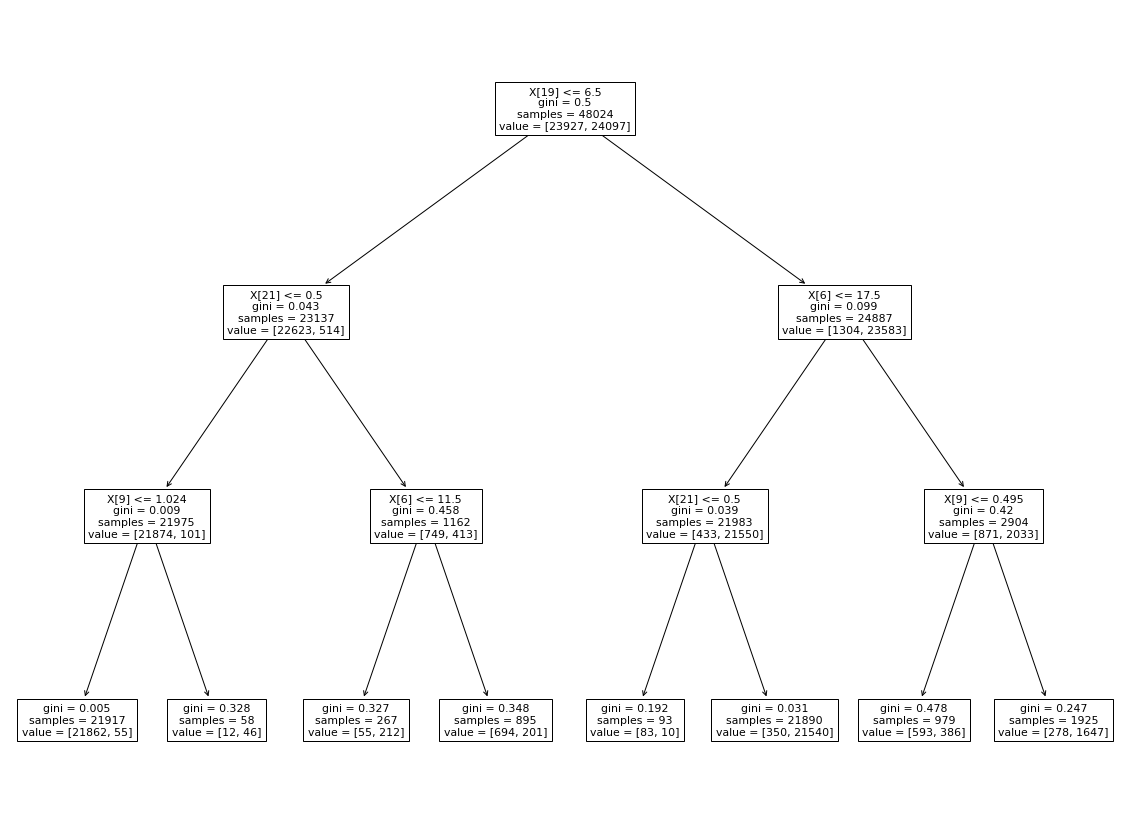

In [84]:
plt.figure(figsize=(20,15))
plot_tree(dt_1)
plt.show()

In [102]:
# 테스트용 실제 레이블 값을 y_test, 예측값을 pred라고 하자.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,roc_auc_score

# 오차행렬
print(confusion_matrix(y_test, dt_1.predict(X_test)))
# 정확도
print(accuracy_score(y_test, dt_1.predict(X_test)))
# 정밀도
print(precision_score(y_test, dt_1.predict(X_test)))
# 재현율
print(recall_score(y_test, dt_1.predict(X_test)))
# ROC
print(roc_auc_score(y_test, dt_1.predict(X_test)))

[[5822  176]
 [ 173 5835]]
0.9709312010661336
0.9707203460322742
0.9712050599201065
0.9709309727743246


In [134]:
# 다중공선성 때 사용했던 변수 재사용
vif_X = X[['firstblood','firstdragon','elders','firstherald','heralds','firstbaron','barons','firsttower','firsttothreetowers','inhibitors']]
vif_X.head()
# 다시 데이터 분류
y = na_droped_data['result']

X_train1, X_test1, y_train1, y_test1 = train_test_split(vif_X, y, test_size=0.2, random_state=42)

In [94]:
# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth' : [3,4,5],'min_samples_leaf': [50,100,150,200],'max_leaf_nodes':[4,5,6,7,8]}

tree_clf = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(tree_clf, param_grid, cv = 5,
                              n_jobs = -1,verbose=1)
grid_search_cv.fit(X_train1,y_train1)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5],
                         'max_leaf_nodes': [4, 5, 6, 7, 8],
                         'min_samples_leaf': [50, 100, 150, 200]},
             verbose=1)

In [95]:
grid_search_cv.best_params_

{'max_depth': 3, 'max_leaf_nodes': 4, 'min_samples_leaf': 50}

In [96]:
tree_dt = grid_search_cv.best_estimator_
tree_dt

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, min_samples_leaf=50,
                       random_state=42)

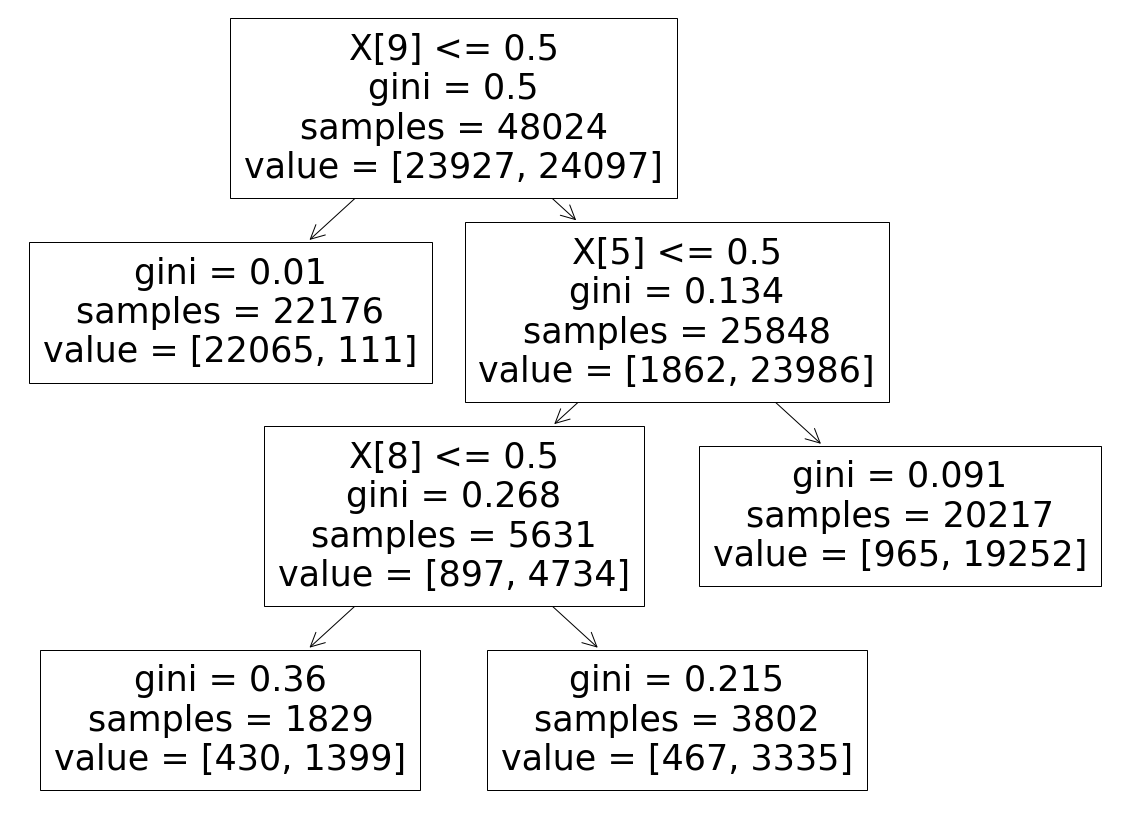

In [90]:
plt.figure(figsize=(20,15))
plot_tree(tree_dt)
plt.show()

In [91]:
tree_dt.score(X_test,y_test)

0.9611027819423622

In [118]:
# 테스트용 실제 레이블 값을 y_test, 예측값을 pred라고 하자.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,roc_auc_score, classification_report

# 오차행렬
print(confusion_matrix(y_test, tree_dt.predict(X_test)))
# 정확도
print(accuracy_score(y_test, tree_dt.predict(X_test)))
# 정밀도
print(precision_score(y_test, tree_dt.predict(X_test)))
# 재현율
print(recall_score(y_test, tree_dt.predict(X_test)))
# ROC
print(roc_auc_score(y_test, tree_dt.predict(X_test)))

print(classification_report(y_test, tree_dt.predict(X_test)))

[[5549  449]
 [  18 5990]]
0.9611027819423622
0.9302686752601336
0.9970039946737683
0.9610728542892015
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      5998
           1       0.93      1.00      0.96      6008

    accuracy                           0.96     12006
   macro avg       0.96      0.96      0.96     12006
weighted avg       0.96      0.96      0.96     12006



In [382]:
y_train_pred = cross_val_predict(DT_clf, X_train, y_train, cv = 5)
confusion_matrix(y_train, y_train_pred)

array([[23277,   650],
       [  689, 23408]], dtype=int64)

### 세 모델 비교

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 정확도와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

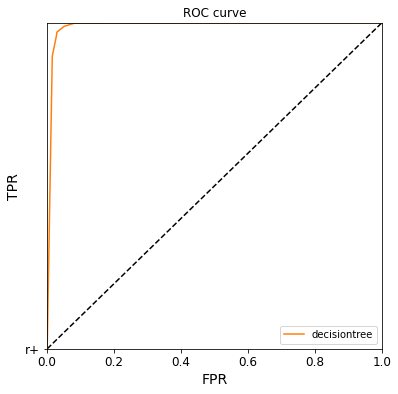

In [178]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, dt_1.predict_proba(X_test)[:,1])
#fpr1, tpr1, thresholds1 = roc_curve(y_test, log_clf.predict_proba(X_test)[:,1])
#fpr2, tpr2, thresholds2 = roc_curve(y_test, svm_bp.predict_proba(scaler.fit_transform(X_test))[:,1])
plt.figure(figsize=(6,6))
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(fpr, tpr, label='decisiontree')
#plt.plot(fpr1, tpr1, label='logistic regression')
#plt.plot(fpr2, tpr2, label='svm')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()


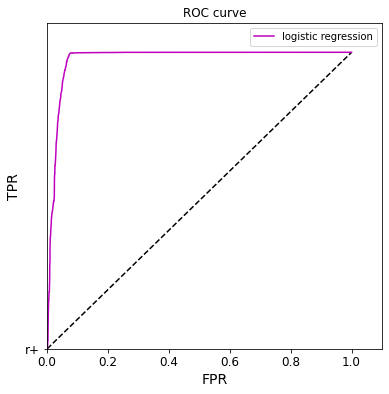

<Figure size 432x288 with 0 Axes>

In [181]:
from sklearn.metrics import roc_curve

#fpr, tpr, thresholds = roc_curve(y_test, dt_1.predict_proba(X_test)[:,1])
fpr1, tpr1, thresholds1 = roc_curve(y_test1, log_clf.predict_proba(X_test1)[:,1])
#fpr2, tpr2, thresholds2 = roc_curve(y_test, svm_bp.predict_proba(scaler.fit_transform(X_test))[:,1])
#plt.box(False)
plt.figure(figsize=(6,6))
plt.xlim(0,1.1)
plt.ylim(0,1.1)
plt.plot([0,1], [0,1], "k--", "r+")
#plt.plot(fpr, tpr, label='decisiontree')
plt.plot(fpr1, tpr1,"m-",label='logistic regression')# label='logistic regression'
#plt.plot(fpr2, tpr2, label='svm')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
plt.savefig('myfigure.pdf', transparent = True)

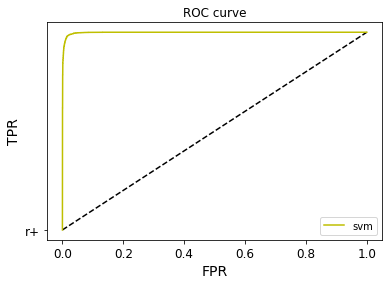

<Figure size 432x288 with 0 Axes>

In [173]:
from sklearn.metrics import roc_curve

#fpr, tpr, thresholds = roc_curve(y_test, dt_1.predict_proba(X_test)[:,1])
#fpr1, tpr1, thresholds1 = roc_curve(y_test1, log_clf.predict_proba(X_test1)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, svm_bp.predict_proba(scaler.fit_transform(X_test[selected_name]))[:,1])
#plt.box(False)
plt.plot([0,1], [0,1], "k--", "r+")
#plt.plot(fpr, tpr, label='decisiontree')
#plt.plot(fpr1, tpr1,"m-")# label='logistic regression'
plt.plot(fpr2, tpr2,'y', label='svm')#  label='svm'
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
plt.savefig('myfigure.pdf', transparent = True)